In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
toxicity = fetch_ucirepo(id=728)
X = toxicity.data.features
y = toxicity.data.targets
print(toxicity.metadata)
# variable information
print(toxicity.variables)

{'uci_id': 728, 'name': 'Toxicity', 'repository_url': 'https://archive.ics.uci.edu/dataset/728/toxicity-2', 'data_url': 'https://archive.ics.uci.edu/static/public/728/data.csv', 'abstract': 'The dataset includes 171 molecules designed for functional domains of a core clock protein, CRY1, responsible for generating circadian rhythm. 56 of the molecules are toxic and the rest are non-toxic.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 171, 'num_features': 1203, 'feature_types': [], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Thu May 05 2022', 'dataset_doi': '10.24432/C59313', 'creators': ['Şeref Gül', 'FATIH RAHIM'], 'intro_paper': {'ID': 128, 'type': 'NATIVE', 'title': 'Structure-based design and classifications of small molecules regulating the circadian rhythm period', 'authors': 'Seref Gul, F. Rahim, Sa

In [3]:
print(X.columns)

Index(['MATS3v', 'nHBint10', 'MATS3s', 'MATS3p', 'nHBDon_Lipinski',
       'minHBint8', 'MATS3e', 'MATS3c', 'minHBint2', 'MATS3m',
       ...
       'WTPT-3', 'WTPT-4', 'WTPT-5', 'ETA_EtaP_L', 'ETA_EtaP_F', 'ETA_EtaP_B',
       'nT5Ring', 'SHdNH', 'ETA_dEpsilon_C', 'MDEO-22'],
      dtype='object', length=1203)


In [4]:
print(toxicity.data.targets )

        Class
0    NonToxic
1    NonToxic
2    NonToxic
3    NonToxic
4    NonToxic
..        ...
166  NonToxic
167  NonToxic
168  NonToxic
169     Toxic
170     Toxic

[171 rows x 1 columns]


In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
toxicity = fetch_ucirepo(id=728)

# Data (as pandas DataFrames)
X = toxicity.data.features
y = toxicity.data.targets

# Combine features and target into a single DataFrame
toxicity_df = pd.concat([X, y], axis=1)
# Export the dataset to a CSV file
csv_filename = 'toxicity_dataset.csv'
toxicity_df.to_csv(csv_filename, index=False)

In [6]:
import pandas as pd

# Load the uploaded dataset
file_path = 'toxicity_dataset.csv'
data = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset for initial exploration
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.6+ MB


(None,
    MATS3v  nHBint10  MATS3s  MATS3p  nHBDon_Lipinski  minHBint8  MATS3e  \
 0  0.0908         0  0.0075  0.0173                0        0.0 -0.0436   
 1  0.0213         0  0.1144 -0.0410                0        0.0  0.1231   
 2  0.0018         0 -0.0156 -0.0765                2        0.0 -0.1138   
 3 -0.0251         0 -0.0064 -0.0894                3        0.0 -0.0747   
 4  0.0135         0  0.0424 -0.0353                0        0.0 -0.0638   
 
    MATS3c  minHBint2  MATS3m  ...   WTPT-4   WTPT-5  ETA_EtaP_L  ETA_EtaP_F  \
 0  0.0409        0.0  0.1368  ...   0.0000   0.0000      0.1780      1.5488   
 1 -0.0316        0.0  0.1318  ...   8.8660  19.3525      0.1739      1.3718   
 2 -0.1791        0.0  0.0615  ...   5.2267  27.8796      0.1688      1.4395   
 3 -0.1151        0.0  0.0361  ...   7.7896  24.7336      0.1702      1.4654   
 4  0.0307        0.0  0.0306  ...  12.3240  19.7486      0.1789      1.4495   
 
    ETA_EtaP_B  nT5Ring  SHdNH  ETA_dEpsilon_C  MDEO-

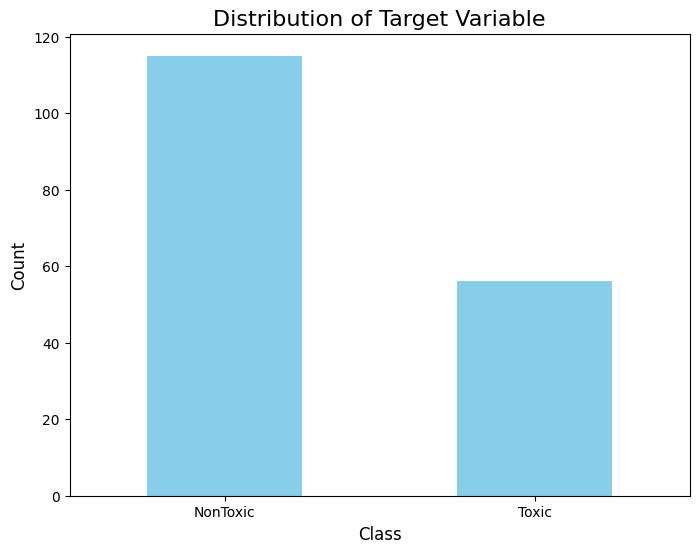

In [7]:
# Plot the distribution of the 'Class' variable
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_distribution = data['Class'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [8]:
import numpy as np
# Ensure that only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])
# Compute the correlation between features and the target ('Class_numeric')
correlation_with_target = numeric_data.corr()['Class_numeric'].sort_values(ascending=False)
# Convert the correlations to a DataFrame for a tabular format
correlation_table = pd.DataFrame(correlation_with_target).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Class_numeric']
# Display the table
correlation_table

KeyError: 'Class_numeric'

In [9]:
from matplotlib import pyplot as plt
correlation_table['Correlation with Class_numeric'].plot(kind='hist', bins=20, title='Correlation with Class_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'correlation_table' is not defined

In [10]:

# Reload the dataset
toxicity_df = pd.read_csv('toxicity_dataset.csv')

# Check the class distribution
class_distribution = toxicity_df['Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Detect outliers using a box plot for the top 5 important features
top_important_features = ['MATS1p', 'MATS8i', 'VE1_Dzp', 'ETA_Eta_F_L', 'ATSC7p']

plt.figure(figsize=(15, 10))
toxicity_df[top_important_features].boxplot()
plt.title('Boxplot of Top Important Features to Identify Outliers')
plt.show()


NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

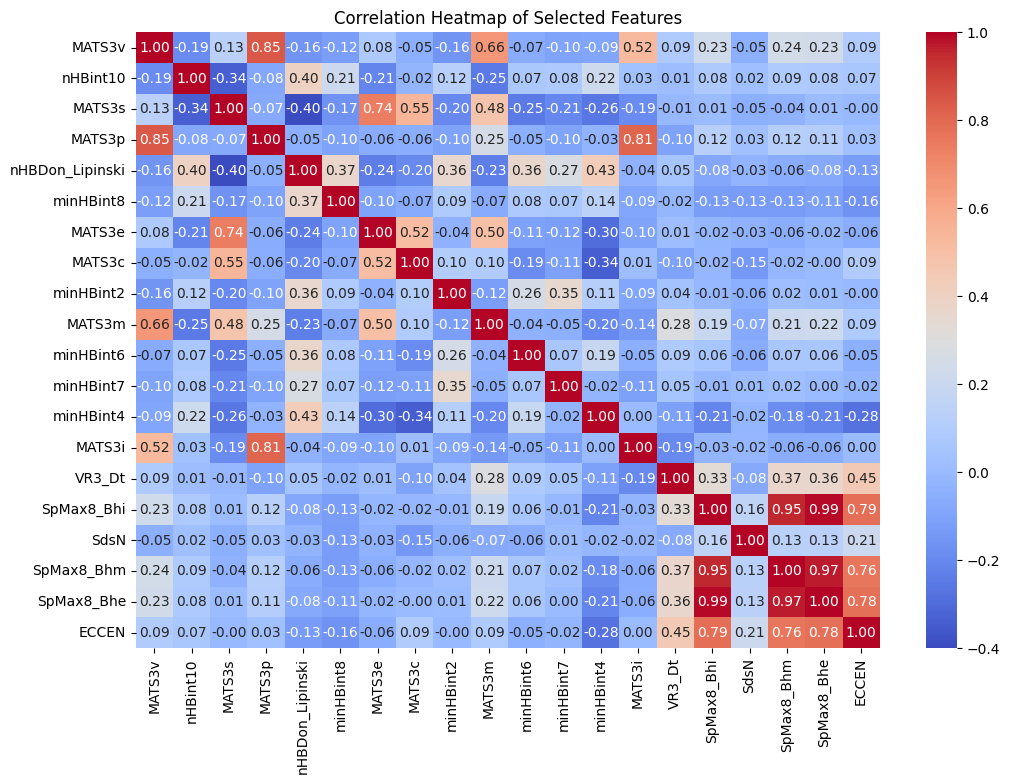

In [11]:
import  seaborn as sns
# Select a subset of columns (first 20 numerical features) for visualization
feature_columns = toxicity_df.columns[:20]

# Compute the correlation matrix for the selected features
correlation_matrix = toxicity_df[feature_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


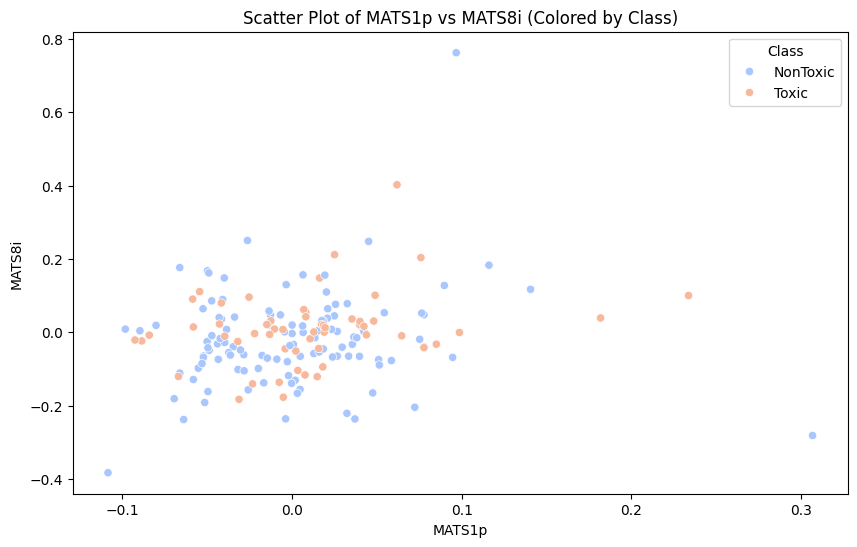

In [12]:
# Let's visualize the relationship between the top 2 most important features and the 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=toxicity_df['MATS1p'], y=toxicity_df['MATS8i'], hue=toxicity_df['Class'], palette='coolwarm')
plt.title("Scatter Plot of MATS1p vs MATS8i (Colored by Class)")
plt.xlabel("MATS1p")
plt.ylabel("MATS8i")
plt.show()

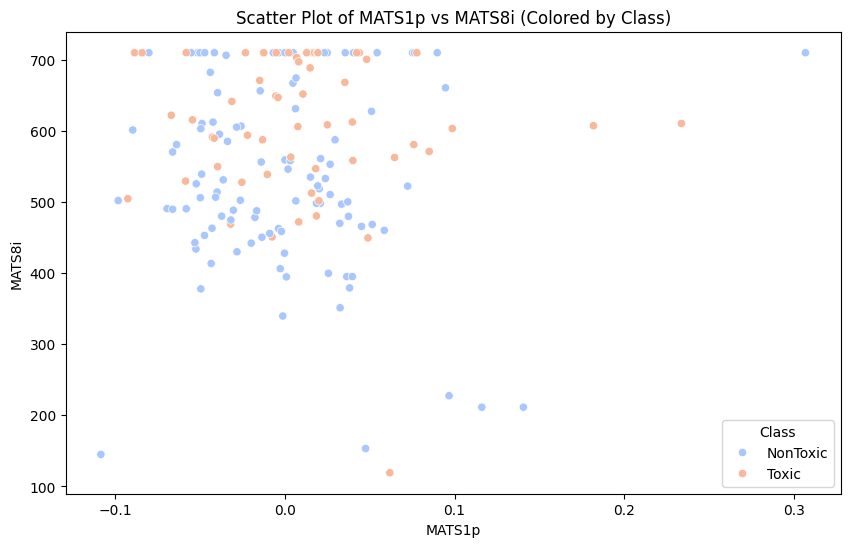

In [13]:
# Let's visualize the relationship between the top 2 most important features and the 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=toxicity_df['MATS1p'], y=toxicity_df['EE_Dt'], hue=toxicity_df['Class'], palette='coolwarm')
plt.title("Scatter Plot of MATS1p vs MATS8i (Colored by Class)")
plt.xlabel("MATS1p")
plt.ylabel("MATS8i")
plt.show()

In [14]:
# Convert the 'Class' column to numeric values
data['Class'] = data['Class'].apply(lambda x: 1 if x == 'Toxic' else 0)
# Compute the correlation matrix for numeric columns
correlation_matrix = data.corr()
# Get the top 10 features with the highest correlation to the target 'Class'
target_correlation = correlation_matrix['Class'].abs().sort_values(ascending=False).head(11)
# Display the top 10 correlated features
print(target_correlation)

Class         1.000000
EE_Dt         0.214785
C2SP2         0.189377
AATSC7p       0.165491
SpDiam_Dt     0.165033
MLogP         0.164396
MATS7p        0.163581
nAcid         0.160158
nwHBa         0.157351
GATS7v        0.156486
SpMin4_Bhi    0.155733
Name: Class, dtype: float64


In [15]:
!pip install eda-report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 12.0 MB/s eta 0:00:00


{'uci_id': 728, 'name': 'Toxicity', 'repository_url': 'https://archive.ics.uci.edu/dataset/728/toxicity-2', 'data_url': 'https://archive.ics.uci.edu/static/public/728/data.csv', 'abstract': 'The dataset includes 171 molecules designed for functional domains of a core clock protein, CRY1, responsible for generating circadian rhythm. 56 of the molecules are toxic and the rest are non-toxic.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 171, 'num_features': 1203, 'feature_types': [], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2021, 'last_updated': 'Thu May 05 2022', 'dataset_doi': '10.24432/C59313', 'creators': ['Şeref Gül', 'FATIH RAHIM'], 'intro_paper': {'ID': 128, 'type': 'NATIVE', 'title': 'Structure-based design and classifications of small molecules regulating the circadian rhythm period', 'authors': 'Seref Gul, F. Rahim, Sa

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.68      0.71      0.69        24
       Toxic       0.30      0.27      0.29        11

    accuracy                           0.57        35
   macro avg       0.49      0.49      0.49        35
weighted avg       0.56      0.57      0.57        35



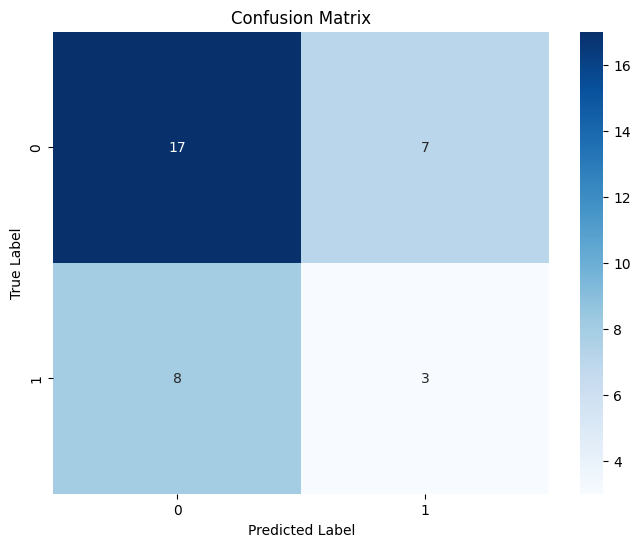

In [16]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = toxicity.data.features
y = toxicity.data.targets

# Step 2: Check the dataset's metadata
print(toxicity.metadata)

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Scale the features (optional, but beneficial for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_scaled, y_train_smote)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Logistic Regression
Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.68      0.71      0.69        24
       Toxic       0.30      0.27      0.29        11

    accuracy                           0.57        35
   macro avg       0.49      0.49      0.49        35
weighted avg       0.56      0.57      0.57        35



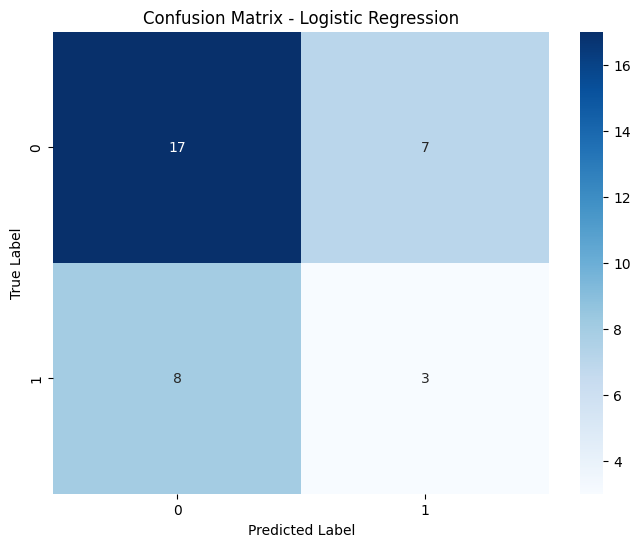

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest
Accuracy: 0.5142857142857142

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.63      0.71      0.67        24
       Toxic       0.12      0.09      0.11        11

    accuracy                           0.51        35
   macro avg       0.38      0.40      0.39        35
weighted avg       0.47      0.51      0.49        35



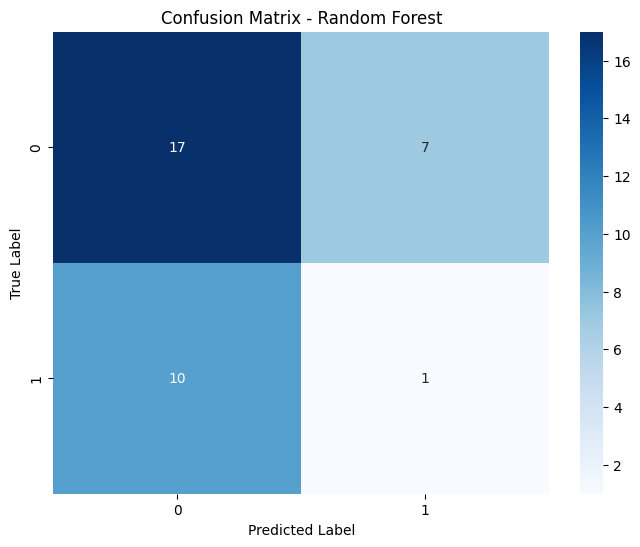

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
Accuracy: 0.6285714285714286

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.74      0.71      0.72        24
       Toxic       0.42      0.45      0.43        11

    accuracy                           0.63        35
   macro avg       0.58      0.58      0.58        35
weighted avg       0.64      0.63      0.63        35



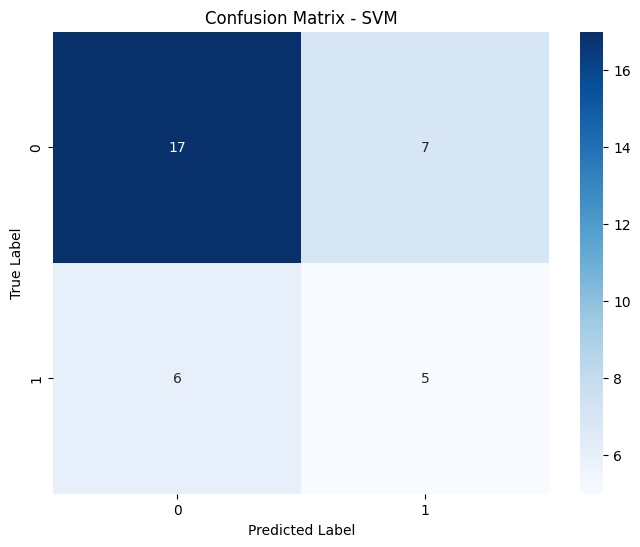

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model: K-Nearest Neighbors
Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

    NonToxic       1.00      0.38      0.55        24
       Toxic       0.42      1.00      0.59        11

    accuracy                           0.57        35
   macro avg       0.71      0.69      0.57        35
weighted avg       0.82      0.57      0.56        35



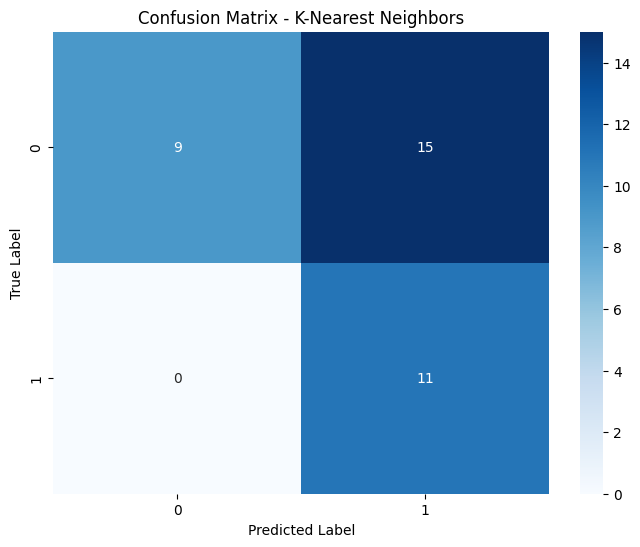

In [17]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = toxicity.data.features
y = toxicity.data.targets

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the features (optional, but beneficial for models like Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the models to be tested
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 6: Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_smote)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    print(f"Model: {model_name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



Tuning and Evaluating Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



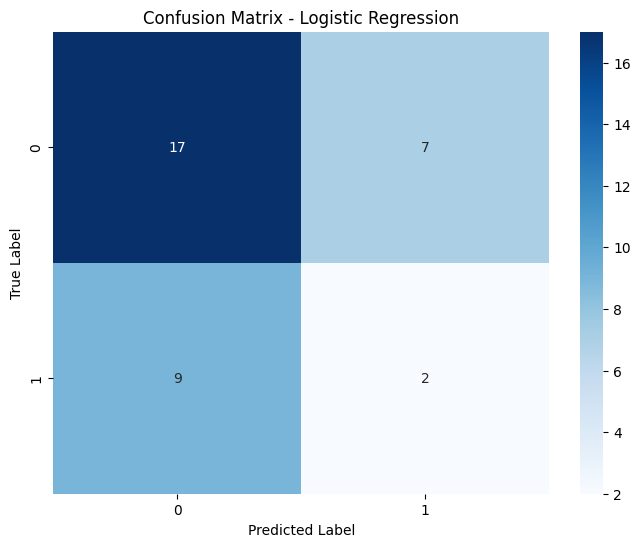


Tuning and Evaluating Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.5714285714285714

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.67      0.75      0.71        24
       Toxic       0.25      0.18      0.21        11

    accuracy                           0.57        35
   macro avg       0.46      0.47      0.46        35
weighted avg       0.54      0.57      0.55        35



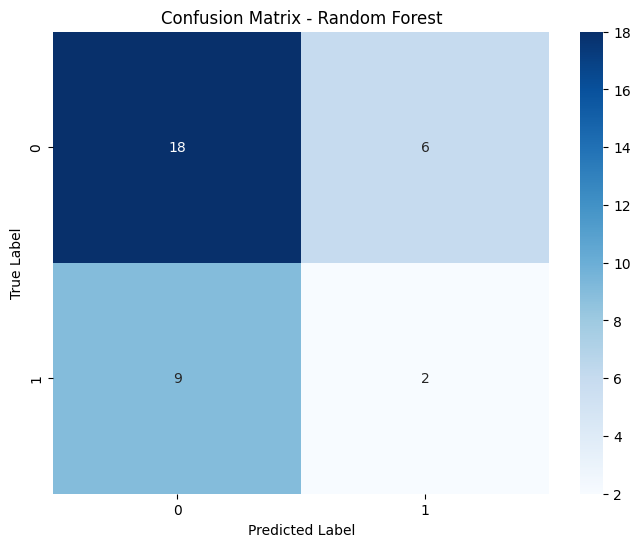


Tuning and Evaluating Model: SVM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



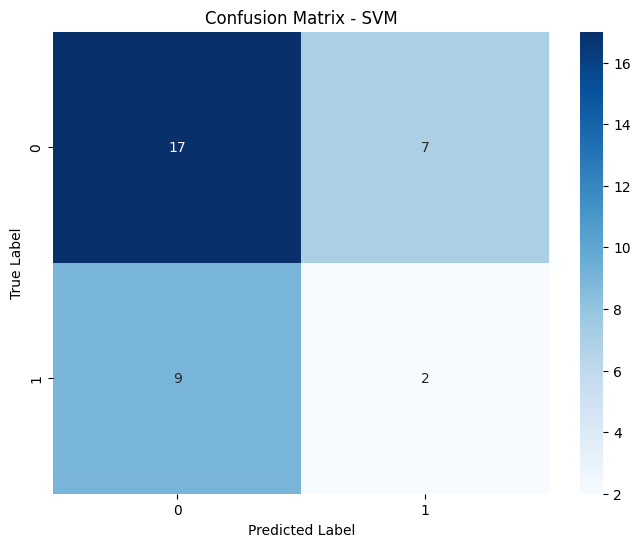


Tuning and Evaluating Model: K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

    NonToxic       1.00      0.42      0.59        24
       Toxic       0.44      1.00      0.61        11

    accuracy                           0.60        35
   macro avg       0.72      0.71      0.60        35
weighted avg       0.82      0.60      0.60        35



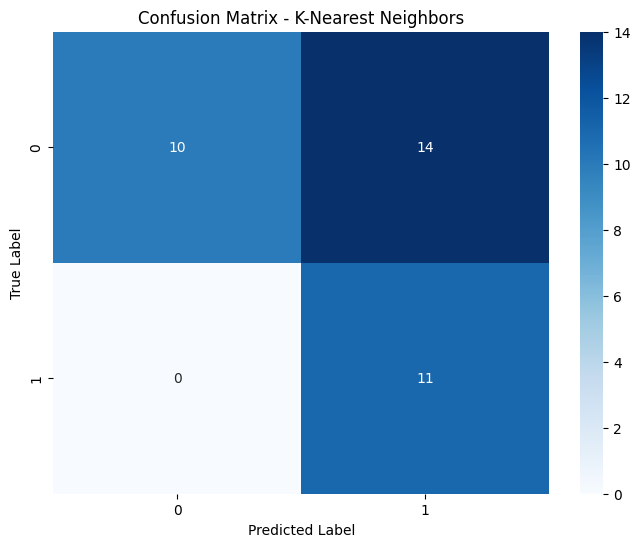

In [18]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = toxicity.data.features
y = toxicity.data.targets

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define models and their hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Step 6: Train, tune, and evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(f"\nTuning and Evaluating Model: {model_name}")

    # Perform grid search
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_smote)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



Tuning and Evaluating Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



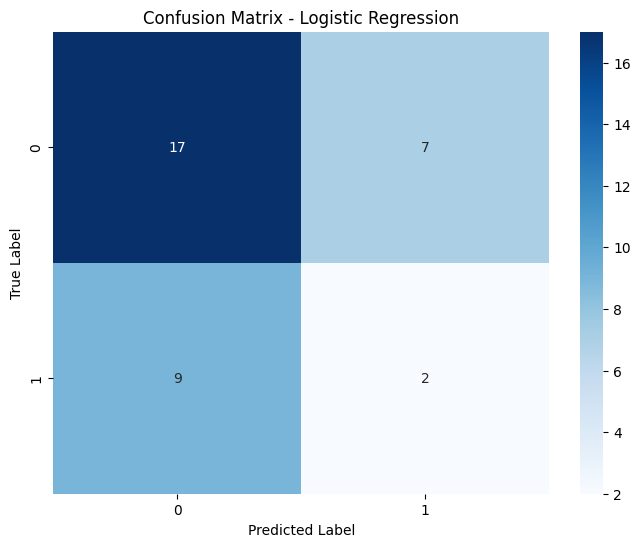


SHAP Analysis for Logistic Regression


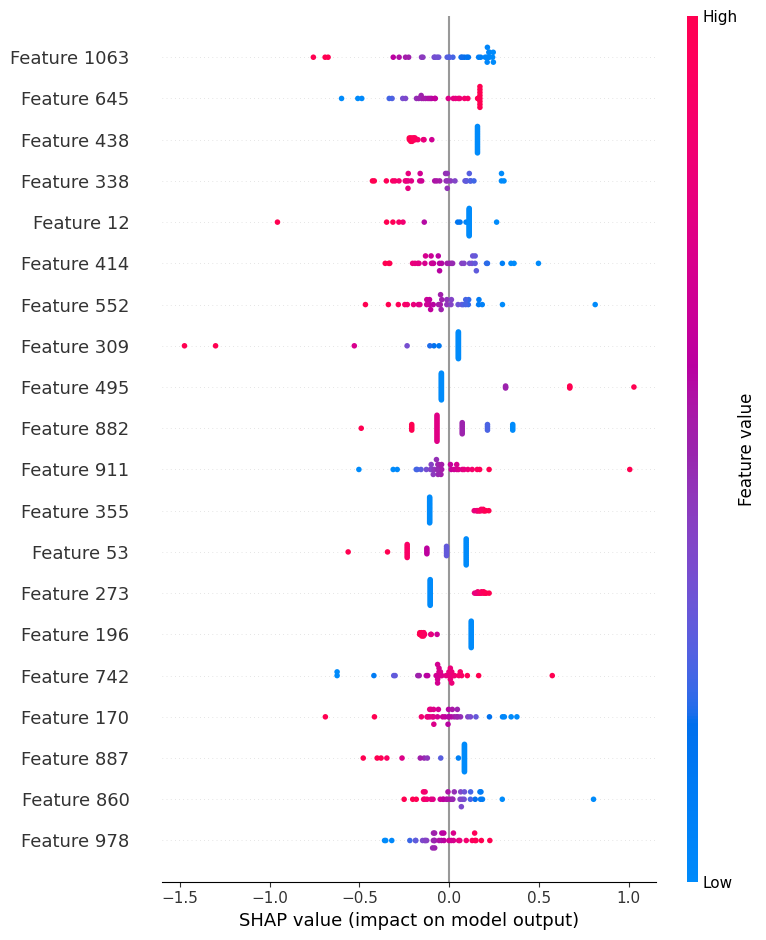


Tuning and Evaluating Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6285714285714286

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.70      0.79      0.75        24
       Toxic       0.38      0.27      0.32        11

    accuracy                           0.63        35
   macro avg       0.54      0.53      0.53        35
weighted avg       0.60      0.63      0.61        35



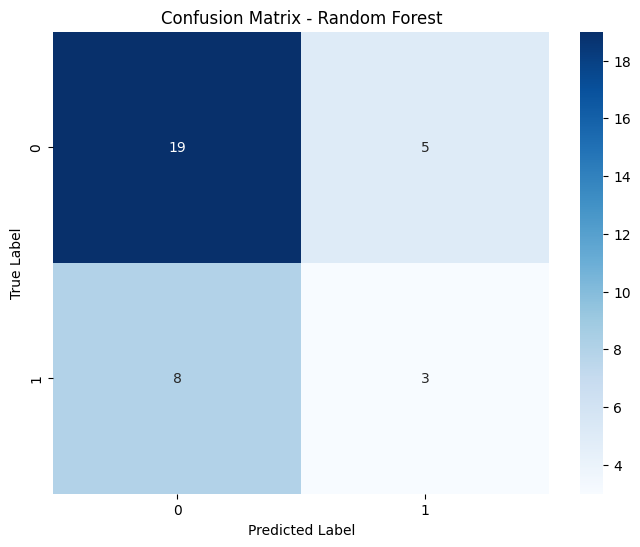


SHAP Analysis for Random Forest


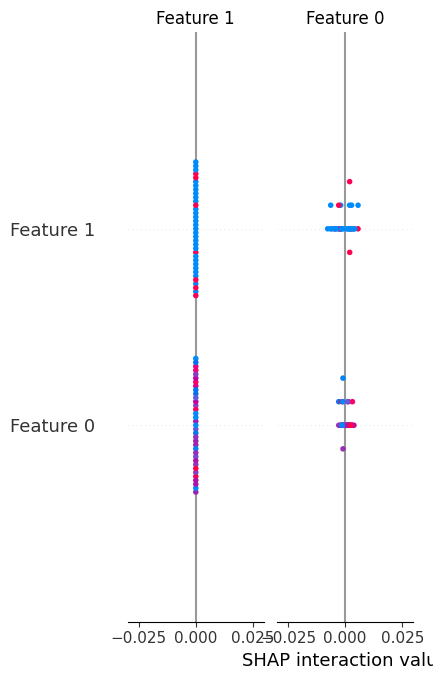


Tuning and Evaluating Model: SVM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



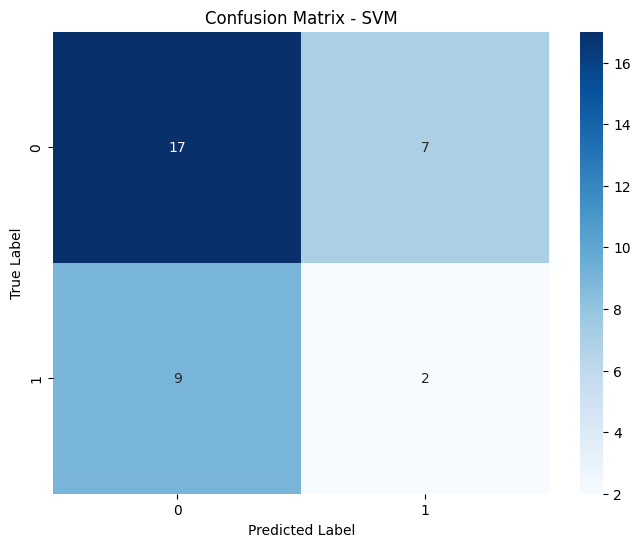


Tuning and Evaluating Model: K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

    NonToxic       1.00      0.42      0.59        24
       Toxic       0.44      1.00      0.61        11

    accuracy                           0.60        35
   macro avg       0.72      0.71      0.60        35
weighted avg       0.82      0.60      0.60        35



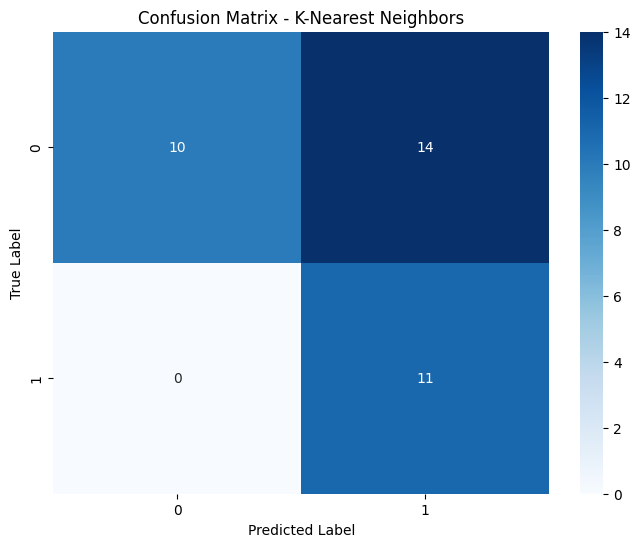

In [19]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = toxicity.data.features
y = toxicity.data.targets
feature_names = toxicity.data.feature_names  # Get feature names for SHAP

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define models and their hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Step 6: Train, tune, evaluate, and explain each model with SHAP where compatible
for model_name, model in models.items():
    print(f"\nTuning and Evaluating Model: {model_name}")

    # Perform grid search
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_smote)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Step 7: SHAP feature importance (for compatible models only)
    if model_name in ['Logistic Regression', 'Random Forest']:
        print(f"\nSHAP Analysis for {model_name}")
        # Use TreeExplainer for RandomForest, and LinearExplainer for Logistic Regression
        if model_name == 'Random Forest':
            explainer = shap.TreeExplainer(best_model)
        elif model_name == 'Logistic Regression':
            explainer = shap.LinearExplainer(best_model, X_train_scaled)

        shap_values = explainer.shap_values(X_test_scaled)

        # Summary plot with feature names
        shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)



Tuning and Evaluating Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



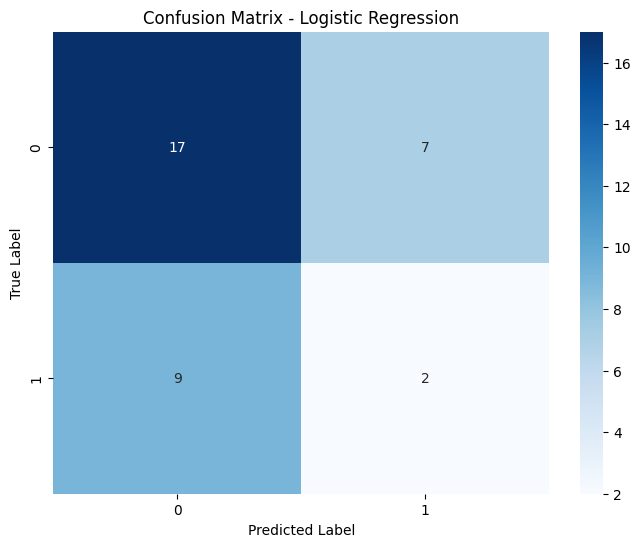


SHAP Analysis for Logistic Regression


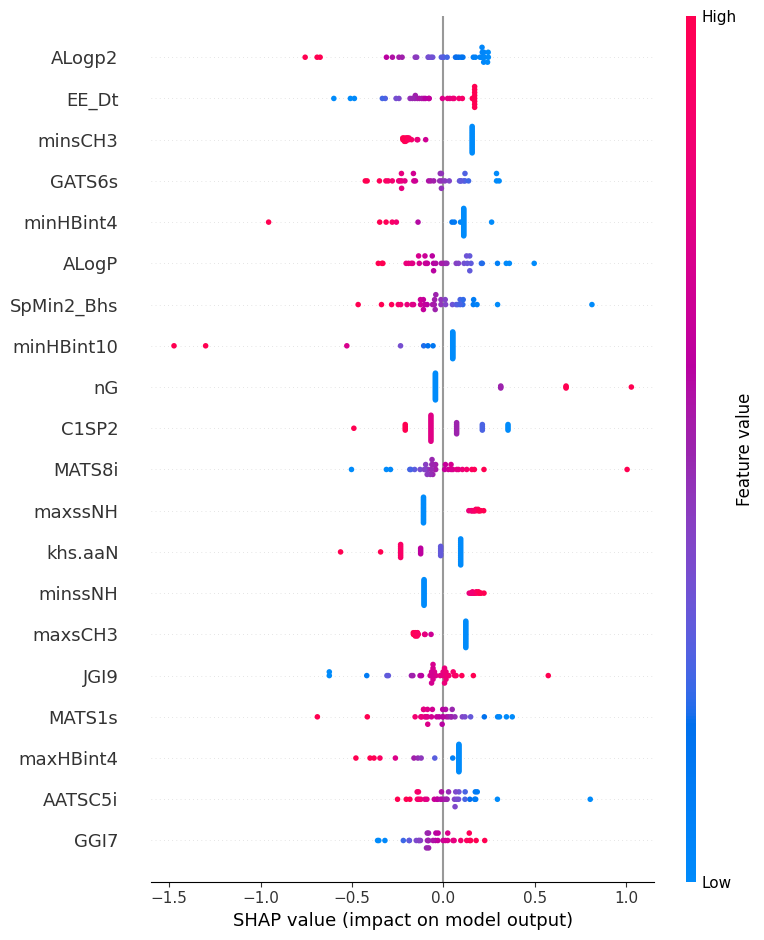


Tuning and Evaluating Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6285714285714286

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.69      0.83      0.75        24
       Toxic       0.33      0.18      0.24        11

    accuracy                           0.63        35
   macro avg       0.51      0.51      0.50        35
weighted avg       0.58      0.63      0.59        35



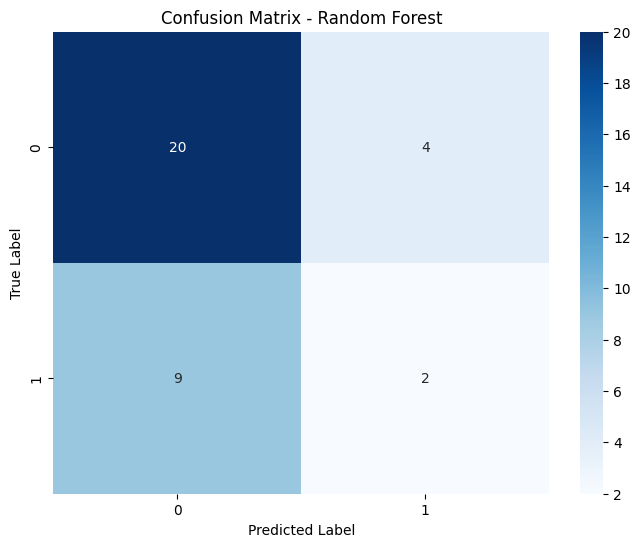


SHAP Analysis for Random Forest


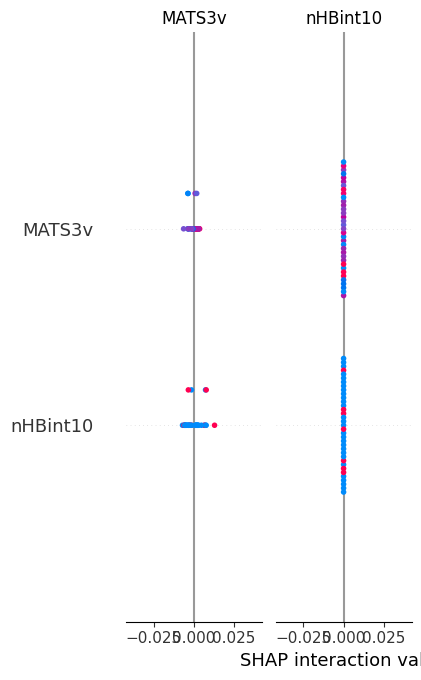


Tuning and Evaluating Model: SVM


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.5428571428571428

Classification Report:
              precision    recall  f1-score   support

    NonToxic       0.65      0.71      0.68        24
       Toxic       0.22      0.18      0.20        11

    accuracy                           0.54        35
   macro avg       0.44      0.45      0.44        35
weighted avg       0.52      0.54      0.53        35



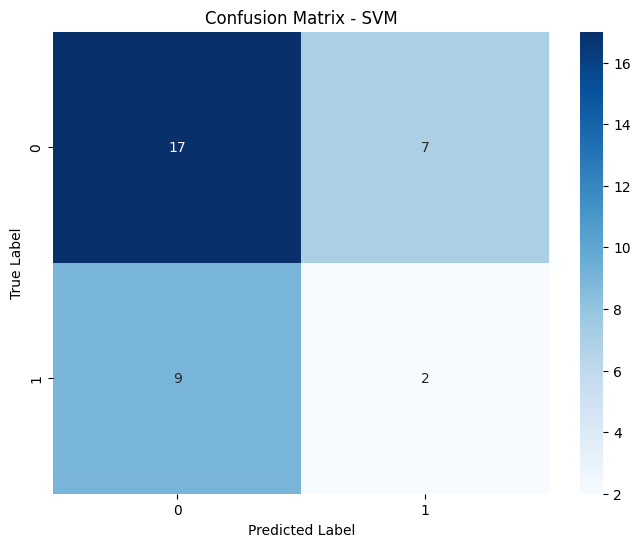


Tuning and Evaluating Model: K-Nearest Neighbors


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

    NonToxic       1.00      0.42      0.59        24
       Toxic       0.44      1.00      0.61        11

    accuracy                           0.60        35
   macro avg       0.72      0.71      0.60        35
weighted avg       0.82      0.60      0.60        35



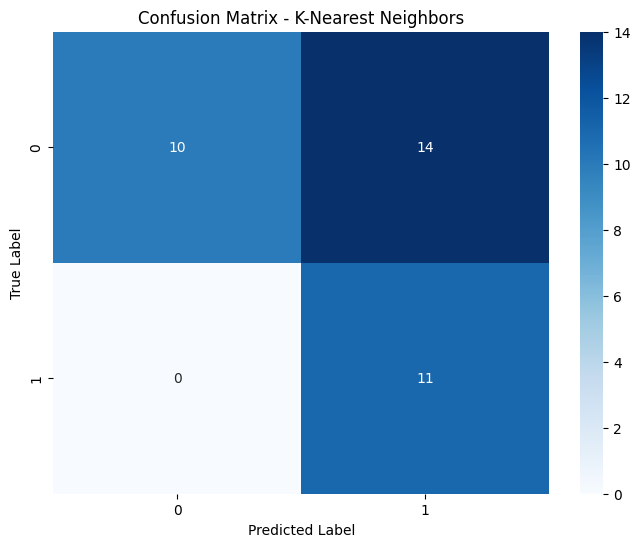

In [20]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pandas as pd

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = pd.DataFrame(toxicity.data.features, columns=toxicity.data.feature_names)  # Map feature names to columns
y = toxicity.data.targets

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names for SHAP
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Step 5: Define models and their hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Step 6: Train, tune, evaluate, and explain each model with SHAP where compatible
for model_name, model in models.items():
    print(f"\nTuning and Evaluating Model: {model_name}")

    # Perform grid search
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled_df, y_train_smote)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = best_model.predict(X_test_scaled_df)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Step 7: SHAP feature importance (for compatible models only)
    if model_name in ['Logistic Regression', 'Random Forest']:
        print(f"\nSHAP Analysis for {model_name}")
        # Use TreeExplainer for RandomForest, and LinearExplainer for Logistic Regression
        if model_name == 'Random Forest':
            explainer = shap.TreeExplainer(best_model)
        elif model_name == 'Logistic Regression':
            explainer = shap.LinearExplainer(best_model, X_train_scaled_df)

        shap_values = explainer.shap_values(X_test_scaled_df)

        # Summary plot with feature names
        shap.summary_plot(shap_values, X_test_scaled_df, feature_names=X.columns)


<ipython-input-26-f72e3261133a>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette="viridis")


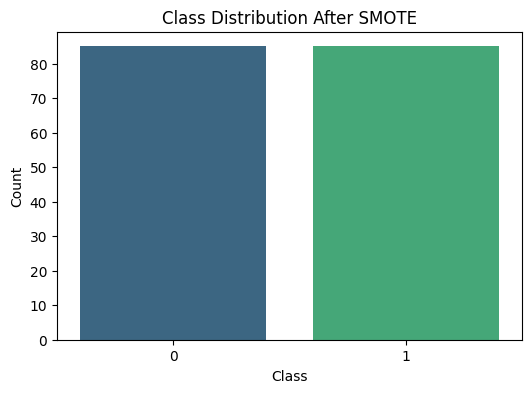

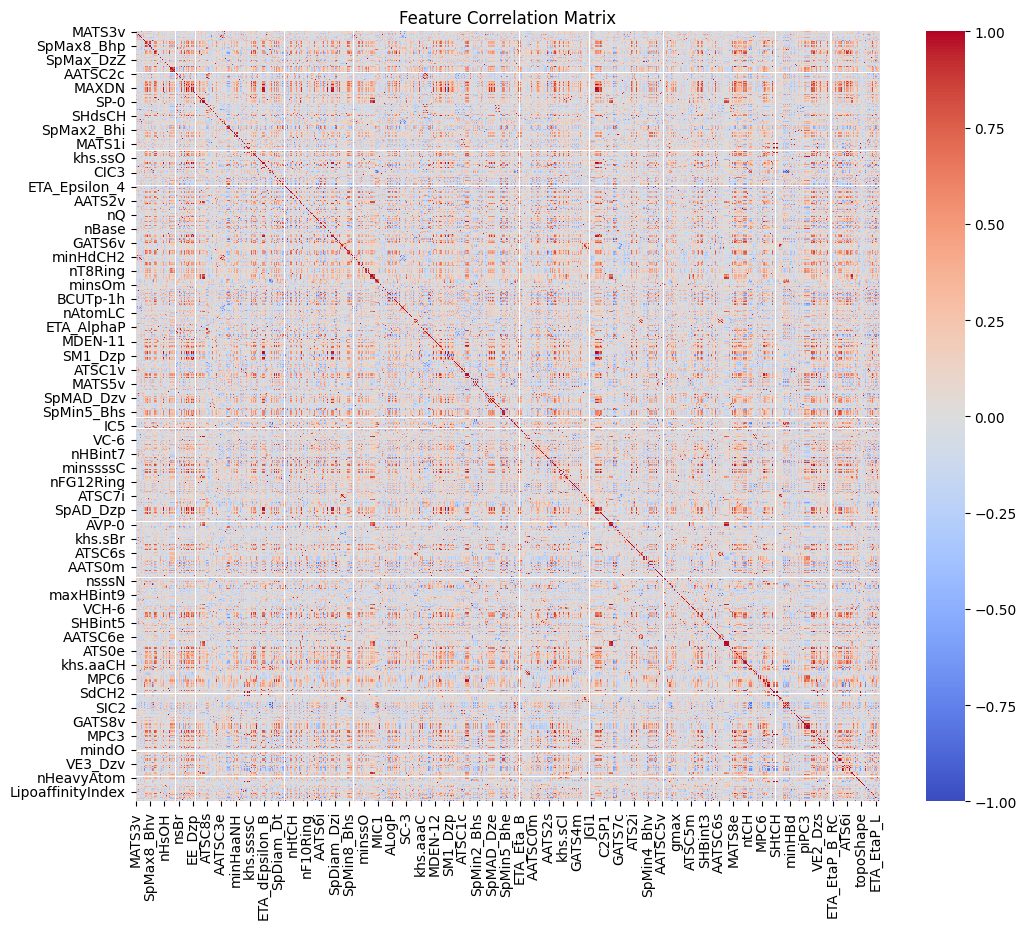

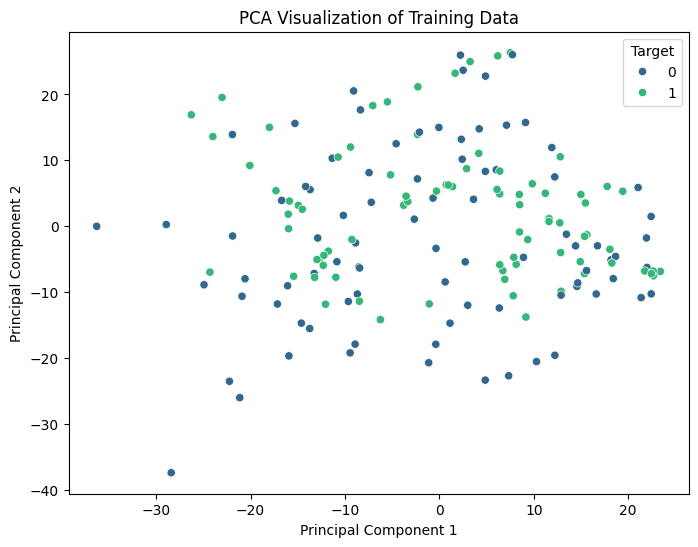


Tuning and Evaluating Model: Logistic Regression
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.36363636363636365

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46        22
           1       0.19      0.27      0.22        11

    accuracy                           0.36        33
   macro avg       0.36      0.34      0.34        33
weighted avg       0.42      0.36      0.38        33



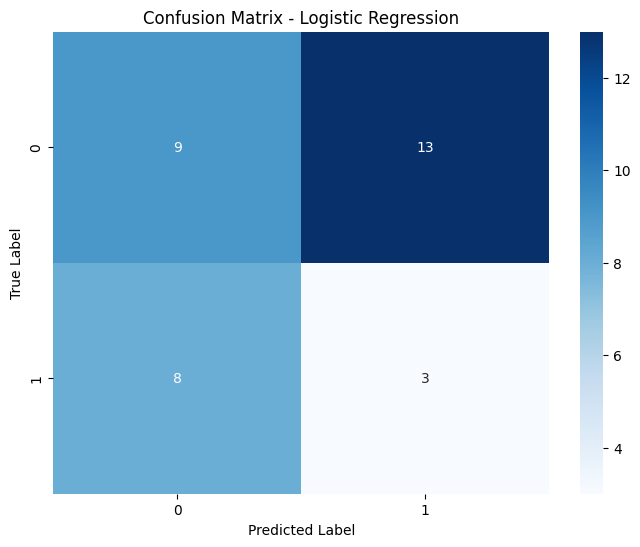

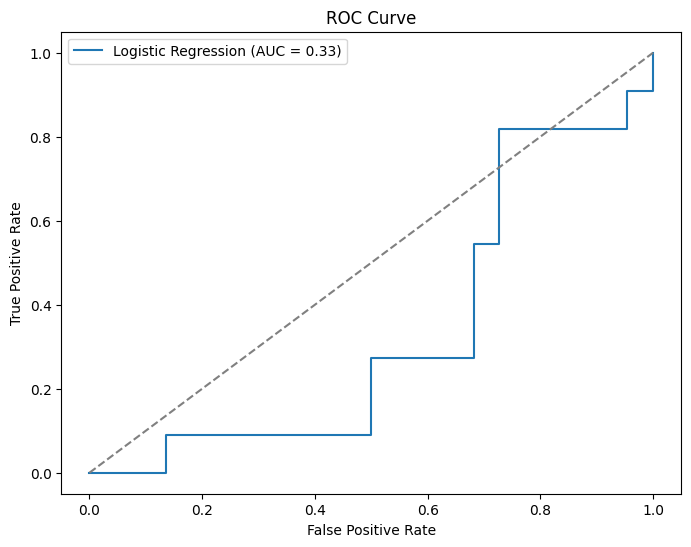


SHAP Analysis for Logistic Regression


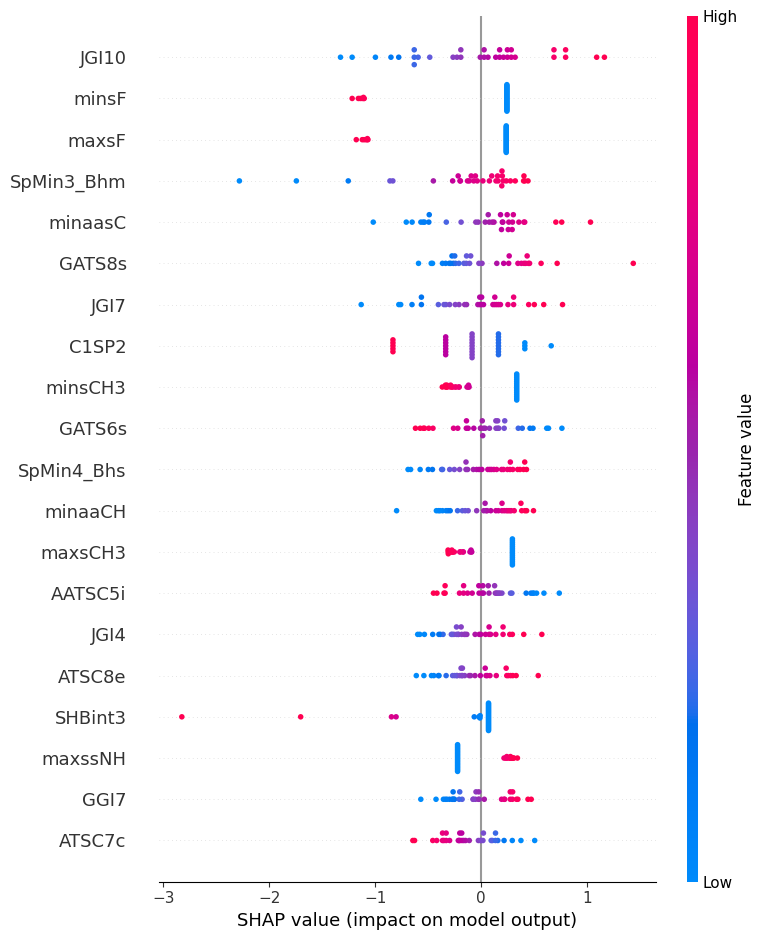


Tuning and Evaluating Model: Random Forest
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.48484848484848486

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        22
           1       0.12      0.09      0.11        11

    accuracy                           0.48        33
   macro avg       0.36      0.39      0.37        33
weighted avg       0.44      0.48      0.46        33



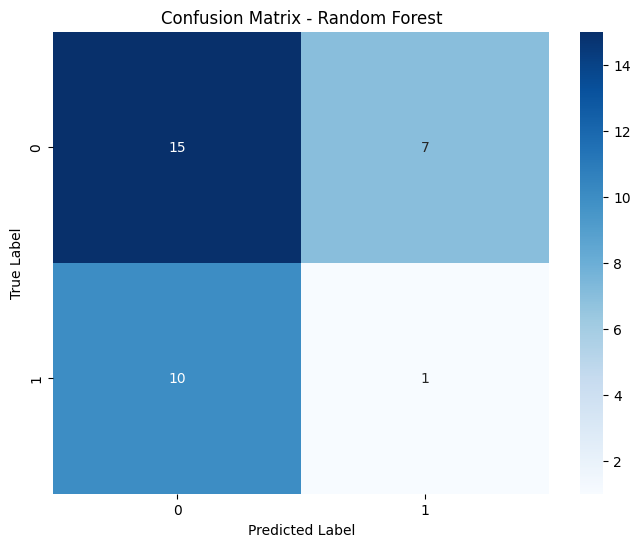

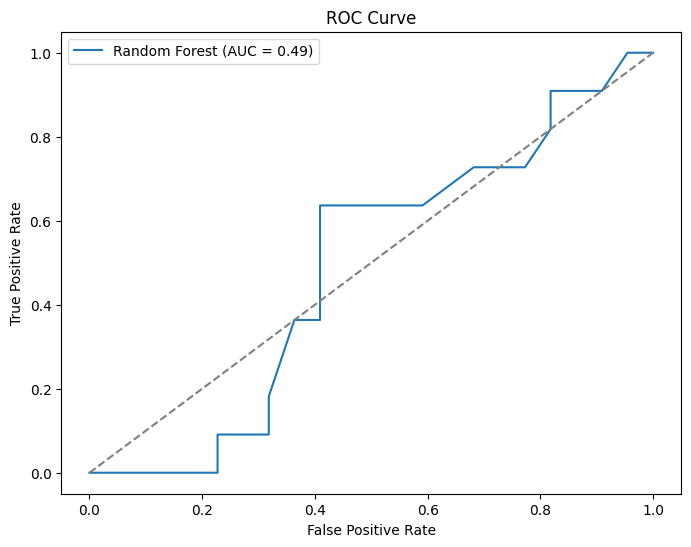


SHAP Analysis for Random Forest


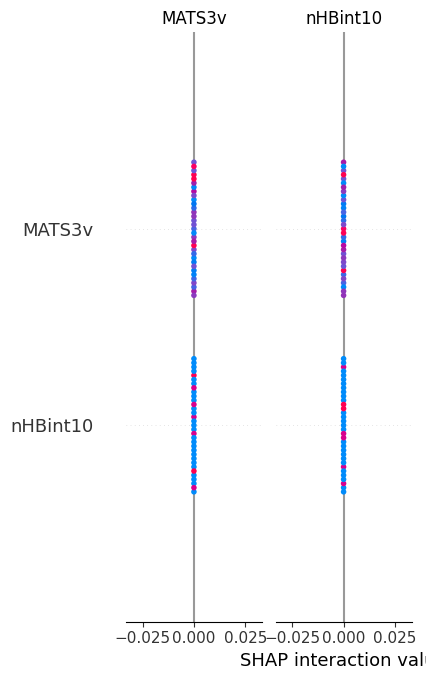


Tuning and Evaluating Model: SVM
Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.36363636363636365

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46        22
           1       0.19      0.27      0.22        11

    accuracy                           0.36        33
   macro avg       0.36      0.34      0.34        33
weighted avg       0.42      0.36      0.38        33



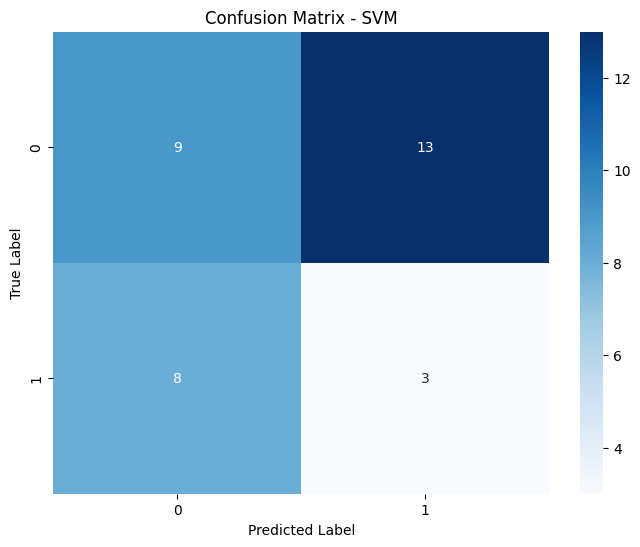

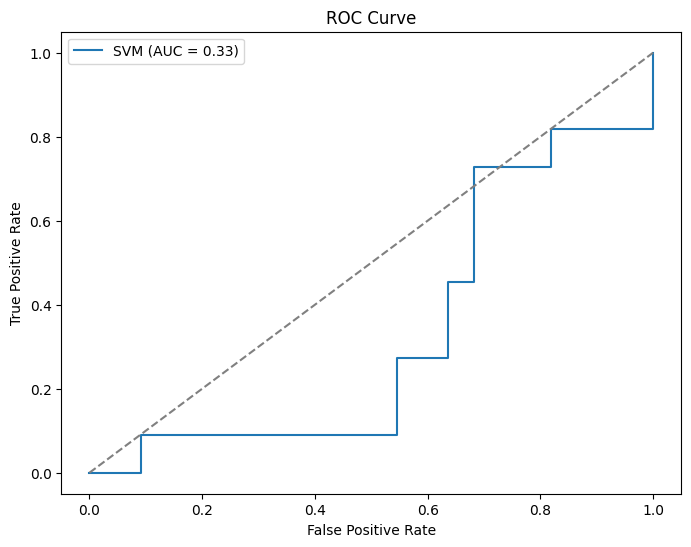


Tuning and Evaluating Model: K-Nearest Neighbors
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.48484848484848486

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.33      0.55      0.41        11

    accuracy                           0.48        33
   macro avg       0.50      0.50      0.48        33
weighted avg       0.56      0.48      0.50        33



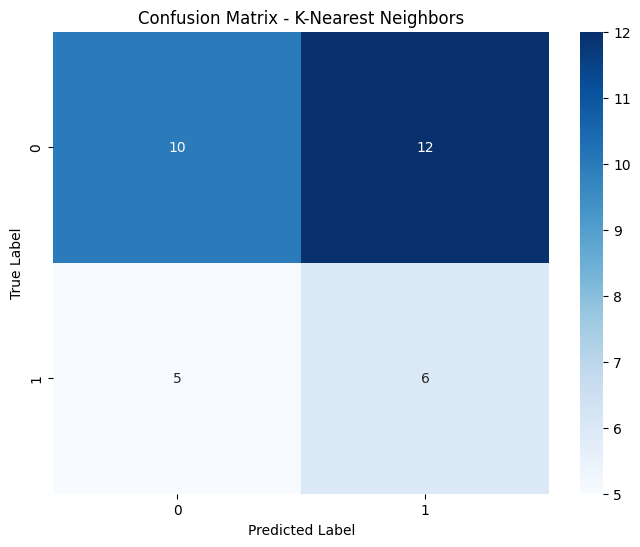

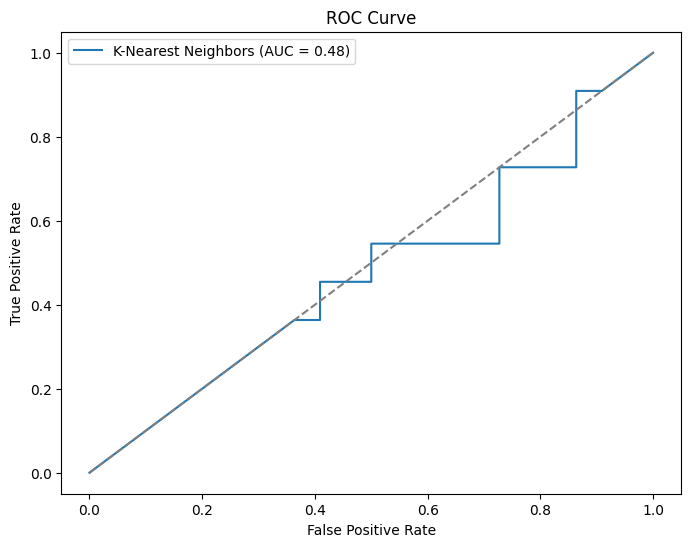

In [26]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pandas as pd
import numpy as np

# Step 1: Fetch dataset from UCI repository
toxicity = fetch_ucirepo(id=728)
X = pd.DataFrame(toxicity.data.features, columns=toxicity.data.feature_names)  # Map feature names to columns
y = pd.Series(toxicity.data.targets.iloc[:, 0].map({'NonToxic': 0, 'Toxic': 1}), name="Target")  # Ensure targets are a 1D array

# Step 2: Outlier Detection and Handling
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(X)
non_outliers = outliers == 1  # Keep only non-outliers
X = X[non_outliers]
y = y[non_outliers]

# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE for class balancing on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 6: Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(X_train_smote, columns=X.columns).corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 7: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_smote, palette="viridis")
plt.title("PCA Visualization of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 8: Define models and their hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Step 9: Train, tune, evaluate, and explain each model with SHAP where compatible
for model_name, model in models.items():
    print(f"\nTuning and Evaluating Model: {model_name}")

    # Perform grid search
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_smote)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    # Step 10: SHAP feature importance (for compatible models only)
    if model_name in ['Logistic Regression', 'Random Forest']:
        print(f"\nSHAP Analysis for {model_name}")
        # Use TreeExplainer for RandomForest, and LinearExplainer for Logistic Regression
        if model_name == 'Random Forest':
            explainer = shap.TreeExplainer(best_model)
        elif model_name == 'Logistic Regression':
            explainer = shap.LinearExplainer(best_model, X_train_scaled)

        shap_values = explainer.shap_values(X_test_scaled)

        # Summary plot with feature names
        shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
